# **Code for first presentation**

In [37]:
import gym
import slimevolleygym
from gym import wrappers
import time
from matplotlib import animation
import matplotlib.pyplot as plt
env_to_wrap = gym.make("SlimeVolley-v0")

In [2]:
env = wrappers.Monitor(env_to_wrap, './videos/SlimeVolley' + time.strftime('%Y_%m_%d_%H_%S') + '/', force = True)
state = env.reset()
t=0
while True:
    t+=1
    env.render()
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()
env_to_wrap.close()

Episode finished after 553 timesteps


In [7]:
env = gym.make("SlimeVolley-v0")
env.unwrapped.get_action_meanings()

['NOOP', 'UP', 'RIGHT', 'LEFT', 'UPRIGHT', 'UPLEFT']

# **Second part of the project**

In [38]:
#python version must be 3.7
!pip install tensorflow==1.15

In [3]:
!pip install stable-baselines[mpi]==2.10.2
!pip install slimevolleygym

### PPO1 algorithm directly trained against Built-in expert agent

In [40]:
import gym
import slimevolleygym
from stable_baselines import PPO1
from stable_baselines.common.evaluation import evaluate_policy
from stable_baselines.common.callbacks import EvalCallback
from stable_baselines.bench import Monitor
import os
import numpy as np

In [57]:
env = gym.make('SlimeVolley-v0')
env = Monitor(env, './logs/')
eval_env = gym.make('SlimeVolley-v0')

eval_callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir='./logs/')
"""eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=500,
                             deterministic=False, render=False)"""

model = PPO1('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=100000, callback=eval_callback)

# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=1)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

Num timesteps: 768
Best mean reward: -inf - Last mean reward per episode: -5.00
Saving new best model to ./logs/best_model
Num timesteps: 1792
Best mean reward: -5.00 - Last mean reward per episode: -4.67
Saving new best model to ./logs/best_model
Num timesteps: 2816
Best mean reward: -4.67 - Last mean reward per episode: -4.80
Num timesteps: 3840
Best mean reward: -4.67 - Last mean reward per episode: -4.86
Num timesteps: 4864
Best mean reward: -4.67 - Last mean reward per episode: -4.89
Num timesteps: 5888
Best mean reward: -4.67 - Last mean reward per episode: -4.91
Num timesteps: 6912
Best mean reward: -4.67 - Last mean reward per episode: -4.92
Num timesteps: 7936
Best mean reward: -4.67 - Last mean reward per episode: -4.93
Num timesteps: 8960
Best mean reward: -4.67 - Last mean reward per episode: -4.73
Num timesteps: 9984
Best mean reward: -4.67 - Last mean reward per episode: -4.76
Num timesteps: 10752
Best mean reward: -4.67 - Last mean reward per episode: -4.78
Num timesteps

Num timesteps: 98816
Best mean reward: -4.67 - Last mean reward per episode: -4.93
Num timesteps: 99840
Best mean reward: -4.67 - Last mean reward per episode: -4.93
mean_reward:-5.00 +/- 0.00


### chart

In [21]:
from stable_baselines import results_plotter
from stable_baselines.results_plotter import load_results, ts2xy
import numpy as np
import matplotlib.pyplot as plt

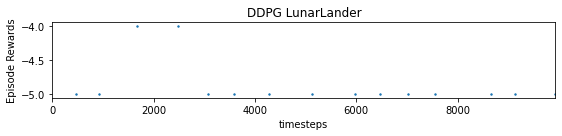

In [42]:
from stable_baselines import results_plotter

# Helper from the library
results_plotter.plot_results(['./logs/'], 1e5, results_plotter.X_TIMESTEPS, "DDPG LunarLander")

In [59]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    print(x)
    print(y)
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()


[  492  1117  1642 ... 98719 99257 99856]
[-5 -4 -5 ... -5 -5 -5]


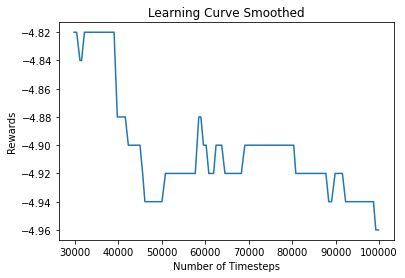

In [60]:
plot_results('./logs/')

### Video

In [16]:
from gym import wrappers
import time
from matplotlib import animation
import matplotlib.pyplot as plt

In [21]:
env = wrappers.Monitor(eval_env, './videos/SlimeVolley' + time.strftime('%Y_%m_%d_%H_%M') + '_PPO' +'/', force = True)
state = env.reset()
t=0
while True:
    t+=1
    env.render()
    action, _states = model.predict(state)
    state, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()
eval_env.close()

Episode finished after 608 timesteps


### PPO2 algorithm directly trained against Built-in expert agent

In [ ]:
from stable_baselines import PPO2
env = gym.make('SlimeVolley-v0')

eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=500,
                             deterministic=False, render=False)

model = PPO2('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=10000, callback=eval_callback)

# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=100)


### Optimized PPO1 algorithm directly trained against Built-in expert agent

In [ ]:
env = gym.make('SlimeVolley-v0')
eval_env = gym.make('SlimeVolley-v0')

eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=10000,
                             deterministic=False, render=False)

model_1 = PPO1('MlpPolicy', env, timesteps_per_actorbatch=4096, clip_param=0.2, entcoeff=0.0
               , optim_epochs=10,optim_stepsize=3e-4, optim_batchsize=64, gamma=0.99
               , lam=0.95, schedule='linear', verbose=2)
model_1.learn(total_timesteps=1000000, callback=eval_callback)
model_1.save(os.path.join('models', "PPO_model"))

# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model_1, eval_env, n_eval_episodes=100)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

### Video

In [ ]:
env = wrappers.Monitor(eval_env, './videos/SlimeVolley' + time.strftime('%Y_%m_%d_%H_%M') + '_PPO' +'/', force = True)
state = env.reset()
t=0
while True:
    t+=1
    env.render()
    action, _states = model_1.predict(state)
    state, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()
eval_env.close()

## **A2C directly traind against Built-in expert againt**

In [4]:
from stable_baselines import A2C

In [5]:
env = gym.make('SlimeVolley-v0')
eval_env = gym.make('SlimeVolley-v0')

eval_callback = EvalCallback(eval_env, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=500,
                             deterministic=False, render=False)

model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000, callback=eval_callback)

# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=100)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

Wrapping the env in a DummyVecEnv.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

---------------------------------------
| EpLenMean          | 631            |
| EpRewMean          | -4.69          |
| EpThisIter         | 1              |
| EpisodesSoFar      | 16             |
| TimeElapsed        | 74.1           |
| TimestepsSoFar     | 10240          |
| ev_tdlam_before    | 0.888          |
| explained_variance | -145           |
| fps                | 13             |
| loss_ent           | 1.9290515      |
| loss_kl            | 3.0267984e-08  |
| loss_pol_entpen    | -0.019290514   |
| loss_pol_surr      | -4.6381727e-05 |
| loss_vf_loss       | 0.005139376    |
| nupdates           | 1              |
| policy_entropy     | 2.08           |
| total_timesteps    | 5              |
| value_loss         | 0.0156         |
---------------------------------------
Eval num_timesteps=500, episode_reward=-5.00 

Eval num_timesteps=9500, episode_reward=-4.60 +/- 0.49
Episode length: 605.00 +/- 80.07
---------------------------------
| explained_variance | 0.948    |
| fps                | 142      |
| nupdates           | 1900     |
| policy_entropy     | 2.03     |
| total_timesteps    | 9500     |
| value_loss         | 0.000208 |
---------------------------------
Eval num_timesteps=10000, episode_reward=-4.80 +/- 0.40
Episode length: 625.00 +/- 85.11
---------------------------------
| explained_variance | -2.85    |
| fps                | 141      |
| nupdates           | 2000     |
| policy_entropy     | 2.06     |
| total_timesteps    | 10000    |
| value_loss         | 0.00386  |
---------------------------------
mean_reward:-4.82 +/- 0.48


## Video

In [24]:
env = wrappers.Monitor(eval_env, './videos/SlimeVolley' + time.strftime('%Y_%m_%d_%H_%M') + '_A2C' +'/', force = True)
state = env.reset()
t=0
while True:
    t+=1
    env.render()
    action, _states = model.predict(state)
    state, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()
eval_env.close()

Episode finished after 428 timesteps
